In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

In [339]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU1_withexog.xlsx')

In [340]:
df.set_index('Date', inplace=True)

In [341]:
# df.describe()

In [342]:
qty_values = df['Sales']
result = adfuller(qty_values)
# Extract and print the test results
print('Dickey-Fuller Test Results:')
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Dickey-Fuller Test Results:
Test Statistic: -1.0969868981071662
p-value: 0.7162719983530378
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [343]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train['Sales'] = None
df_test['Sales'] = None
df_t=df['Sales']
df_train['Sales']=df.iloc[:28]['Sales']
df_test['Sales']=df.iloc[28:]['Sales']
exog_train = df.iloc[:28][['EXG D','EXG H']]
exog_test=df.iloc[28:][['EXG D','EXG H']]
exog_test

,EXG D,EXG H
Date,,
2023-08-01,0,0
2023-09-01,0,0
2023-10-01,1,0
2023-11-01,1,0


<Figure size 1200x600 with 0 Axes>

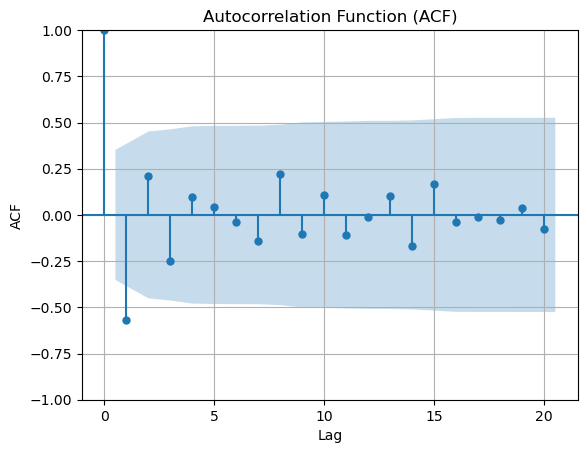

<Figure size 1200x600 with 0 Axes>

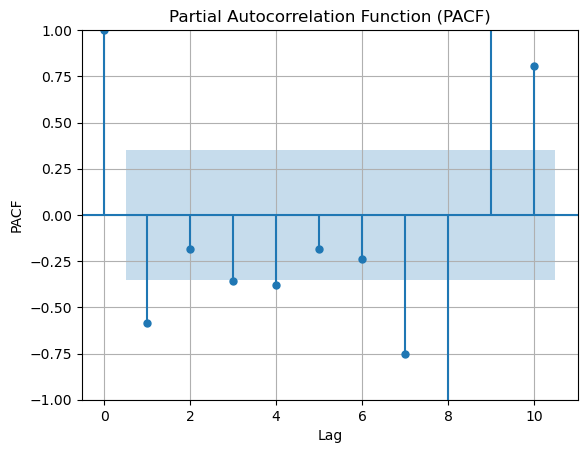

In [344]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df["Sales"].diff().dropna(),lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df["Sales"].diff().dropna(),lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [345]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming df_train and exog_train are already defined
# For example:
# df_train = pd.DataFrame({'shift1': ...})
# exog_train = pd.DataFrame({'exog_var': ...})

# Function to find the best ARIMA model
def find_best_arima_model(y, exog, p_values, q_values, d=1):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(y, exog=exog, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
                print(f'ARIMA({p},{d},{q}) - AIC:{results.aic}')
            except Exception as e:
                print(f'ARIMA({p},{d},{q}) - Failed with error: {e}')
                continue

    return best_order, best_model

# Define the range for p and q
p_values = range(1, 6)
q_values = range(1, 6)

# Find the best ARIMA model
best_order, best_model = find_best_arima_model(df_train['Sales'], exog_train, p_values, q_values)

# Print the best model summary
if best_model is not None:
    print(f'Best ARIMA order: {best_order}')
    print(best_model.summary())
else:
    print('No suitable ARIMA model found.')


ARIMA(1,1,1) - AIC:458.8764710408763
ARIMA(1,1,2) - AIC:459.46262612177713
ARIMA(1,1,3) - AIC:461.0531640659823
ARIMA(1,1,4) - AIC:461.26589146105493
ARIMA(1,1,5) - AIC:466.51908251030125
ARIMA(2,1,1) - AIC:459.32285624750716
ARIMA(2,1,2) - AIC:461.5209560955379
ARIMA(2,1,3) - AIC:462.9987079733391
ARIMA(2,1,4) - AIC:463.5872162027719
ARIMA(2,1,5) - AIC:483.13958464762186
ARIMA(3,1,1) - AIC:462.0339311779088
ARIMA(3,1,2) - AIC:462.2503965523981
ARIMA(3,1,3) - AIC:488.25751058103447
ARIMA(3,1,4) - AIC:516.5136640329782
ARIMA(3,1,5) - AIC:467.6043151137387
ARIMA(4,1,1) - AIC:460.5290290575028
ARIMA(4,1,2) - AIC:462.14737067014784
ARIMA(4,1,3) - AIC:493.24246150678425
ARIMA(4,1,4) - AIC:474.0186039209392
ARIMA(4,1,5) - Failed with error: LU decomposition error.
ARIMA(5,1,1) - AIC:461.96748719514727
ARIMA(5,1,2) - AIC:463.63885416376684
ARIMA(5,1,3) - AIC:501.7726509094652
ARIMA(5,1,4) - AIC:466.77127288658494
ARIMA(5,1,5) - Failed with error: LU decomposition error.
Best ARIMA order: (1, 

In [346]:
model = ARIMA(df_train["Sales"],exog=exog_train, order=(1, 1, 1))
results = model.fit()
print(results.summary())
# Forecast future values for the test data
forecast = results.forecast(steps=len(df_test), exog=exog_test)
forecast = forecast.astype(int)
print(df_test)

df_forecast=forecast
#df_forecast.loc[59]=0
df_forecast

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -224.438
Date:                Mon, 17 Jun 2024   AIC                            458.876
Time:                        13:46:22   BIC                            465.356
Sample:                    04-01-2021   HQIC                           460.803
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EXG D      -1303.9736    417.169     -3.126      0.002   -2121.609    -486.338
EXG H       3666.7707    295.437     12.411      0.000    3087.724    4245.817
ar.L1          0.7666      0.145      5.292      0.0

2023-08-01    2716
2023-09-01    2873
2023-10-01    1690
2023-11-01    1782
Freq: MS, Name: predicted_mean, dtype: int32

Mean Absolute Percentage Error (MAPE): 19.71%


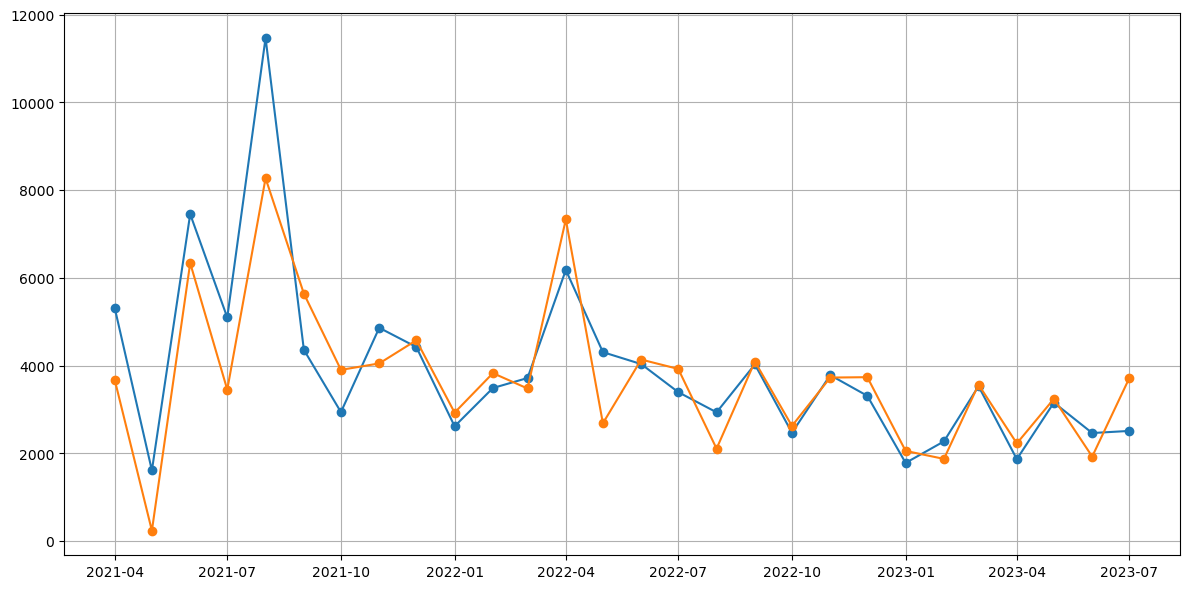

In [347]:
mape = mean_absolute_percentage_error(df_train['Sales'],results.fittedvalues) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
plt.figure(figsize=(12,6))
plt.plot(df_train['Sales'], label='Actual',marker='o')
plt.plot(results.fittedvalues,label='Predicted',marker='o')
plt.grid(True)  # Enable grid lines
plt.tight_layout()

Mean Absolute Percentage Error (MAPE): 9.34%


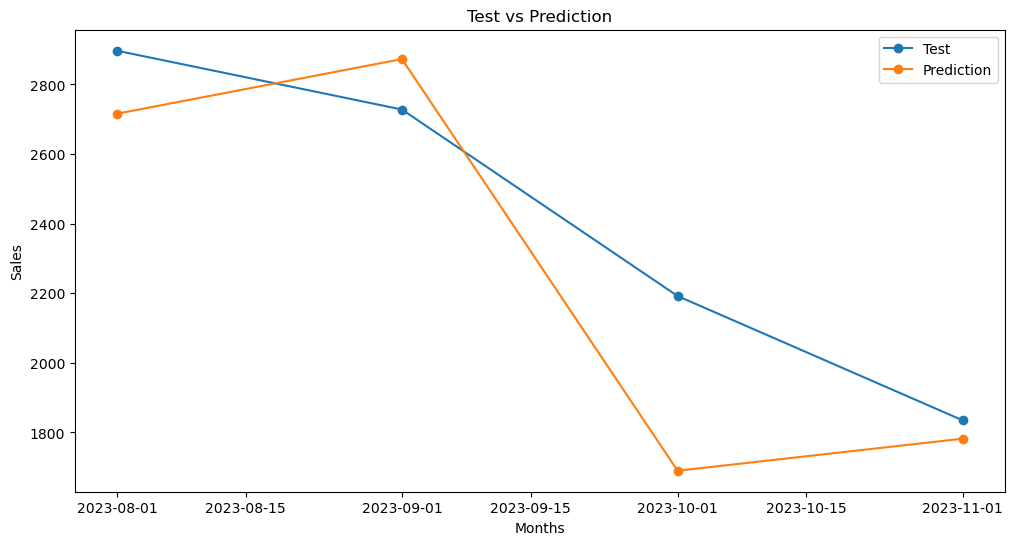

In [348]:
from sklearn.metrics import mean_absolute_percentage_error
# mape = np.mean(np.abs((forecast - df_test['QTY']) / df_test['QTY'])) * 100
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
mape = mean_absolute_percentage_error(df_test['Sales'], df_forecast) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Visualize the forecast
plt.figure(figsize=(12,6))
plt.plot(df_test['Sales'], label='Test',marker='o')
plt.plot(forecast, label='Prediction',marker='o')
plt.legend()
plt.title('Test vs Prediction')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


In [392]:
df_predict = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU1_withexog.xlsx', sheet_name='Sheet1')

In [393]:
df_predict.set_index('Date', inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2023-12-01 to 2024-03-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   EXG D   4 non-null      int64
 1   EXG H   4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


In [394]:
# Extract the relevant exogenous variables
exog_f = df_predict[['EXG D','EXG H']]

In [395]:
# Forecast future values using the results model and exogenous variables
pred = results.forecast(steps=len(df_predict), exog=exog_f)
# Convert predictions to integer
pred = list(pred.astype(int))
# Add the forecasted values to the 'Sales' column of df_predict
df_predict['Sales'] = pred

In [396]:
print(df_predict['Sales'])
df_final=pd.concat([df, df_predict], axis=0)

Date
2023-12-01    1412
2024-01-01    1569
2024-02-01    1690
2024-03-01    3086
Name: Sales, dtype: int64


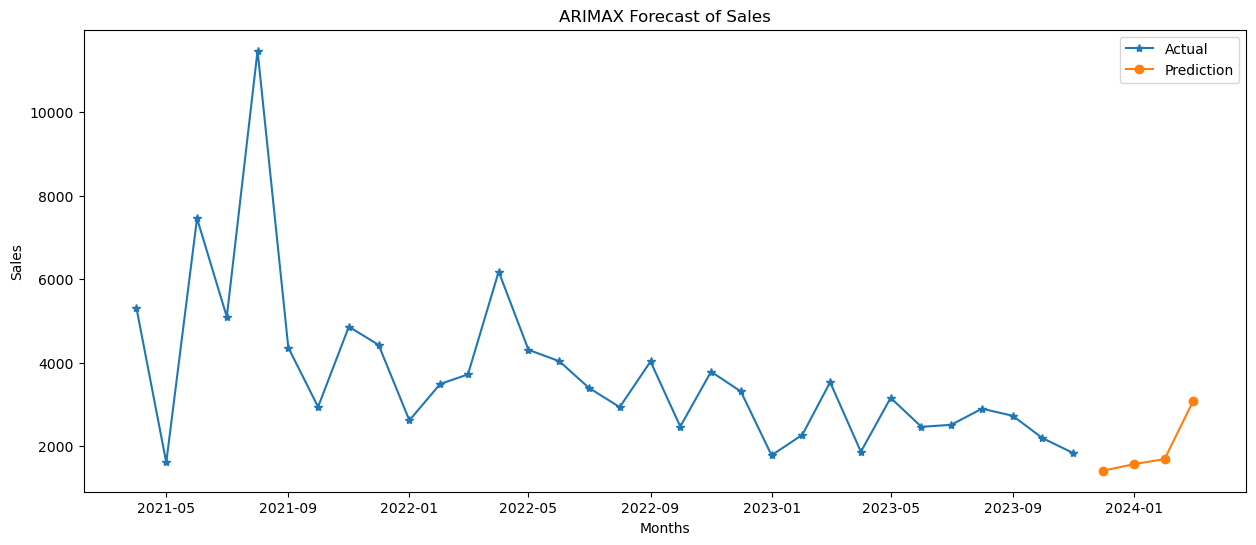

In [397]:
a=32
df_a=df_final.iloc[:a]
df_p=df_final.iloc[a:]
# Visualize the forecast
plt.figure(figsize=(15,6))
plt.plot( df_a['Sales'], label='Actual', marker='*')
plt.plot( df_p['Sales'], label='Prediction', marker='o')
# plt.plot(df_final.index, pred, label='Prediction')
plt.legend()
plt.title('ARIMAX Forecast of Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()